In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import random
import cv2
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction import image

# Set the path to the Caltech101 dataset
dataset_folder = "/content/drive/MyDrive/caltech101"

# Set teh image size
image_size = 256

# Function to load images from a given folder
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        img = cv2.resize(img, (image_size, image_size))
        if img is not None:
            images.append(img)
    return images

# Load and process the dataset
categories = os.listdir(dataset_folder)
random.shuffle(categories)

training_images = []
testing_images = []

# Load 15 random images per category for training and testing
for category in categories:
    image_folder = os.path.join(dataset_folder, category)
    images = load_images_from_folder(image_folder)
    random.shuffle(images)

    training_images.extend(images[:15])
    testing_images.extend(images[15:30])

X_train = np.array(training_images)
y_train = np.array([i // 15 for i in range(len(training_images))])

X_test = np.array(testing_images)
y_test = np.array([i // 15 for i in range(len(testing_images))])

# Normalize pixel values to be between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_size, image_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten the output and add Dense layers for classification
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(len(categories), activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc}")

Epoch 1/10
5/5 [==============================] - 5s 447ms/step - loss: 4.0921 - accuracy: 0.1200 - val_loss: 2.3017 - val_accuracy: 0.1200
Epoch 2/10
5/5 [==============================] - 0s 101ms/step - loss: 2.2279 - accuracy: 0.2733 - val_loss: 2.3549 - val_accuracy: 0.2467
Epoch 3/10
5/5 [==============================] - 0s 101ms/step - loss: 1.9309 - accuracy: 0.4533 - val_loss: 1.9009 - val_accuracy: 0.3800
Epoch 4/10
5/5 [==============================] - 0s 93ms/step - loss: 1.2298 - accuracy: 0.6333 - val_loss: 1.6829 - val_accuracy: 0.4467
Epoch 5/10
5/5 [==============================] - 0s 94ms/step - loss: 0.7493 - accuracy: 0.8000 - val_loss: 1.6544 - val_accuracy: 0.4133
Epoch 6/10
5/5 [==============================] - 0s 90ms/step - loss: 0.4396 - accuracy: 0.8867 - val_loss: 1.7598 - val_accuracy: 0.5600
Epoch 7/10
5/5 [==============================] - 0s 95ms/step - loss: 0.1459 - accuracy: 0.9667 - val_loss: 2.1427 - val_accuracy: 0.5600
Epoch 8/10
5/5 [========


Training model with filters=16, kernel_size=(3, 3), pooling_size=(2, 2), dropout_rate=0
5/5 - 0s - loss: 1.7967 - accuracy: 0.5267 - 97ms/epoch - 19ms/step
Test accuracy: 0.5266666412353516

Training model with filters=16, kernel_size=(3, 3), pooling_size=(3, 3), dropout_rate=0
5/5 - 0s - loss: 1.3401 - accuracy: 0.5600 - 116ms/epoch - 23ms/step
Test accuracy: 0.5600000023841858

Training model with filters=16, kernel_size=(3, 3), pooling_size=(4, 4), dropout_rate=0
5/5 - 0s - loss: 1.3262 - accuracy: 0.5733 - 90ms/epoch - 18ms/step
Test accuracy: 0.5733333230018616

Training model with filters=16, kernel_size=(5, 5), pooling_size=(2, 2), dropout_rate=0
5/5 - 0s - loss: 2.1215 - accuracy: 0.4733 - 117ms/epoch - 23ms/step
Test accuracy: 0.47333332896232605

Training model with filters=16, kernel_size=(5, 5), pooling_size=(3, 3), dropout_rate=0
5/5 - 0s - loss: 1.5333 - accuracy: 0.5600 - 105ms/epoch - 21ms/step
Test accuracy: 0.5600000023841858

Training model with filters=16, kernel_s

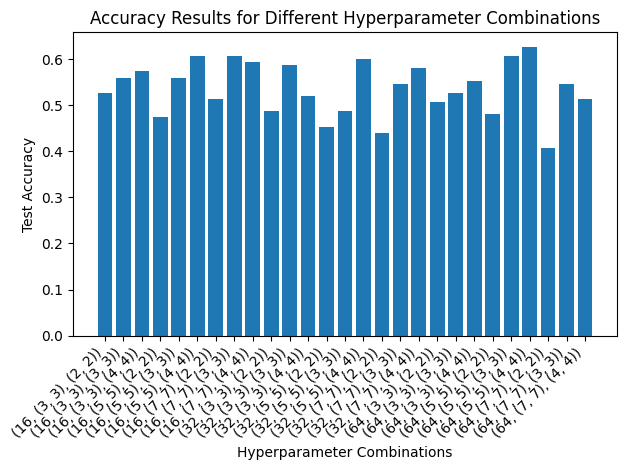

In [ ]:
import matplotlib.pyplot as plt

# Define hyperparameter values to experiment with
filter_sizes = [16, 32, 64]
kernel_sizes = [(3, 3), (5, 5), (7, 7)]
pooling_sizes = [(2, 2), (3, 3), (4, 4)]
dropout_rates = [0]

# Lists to store results
hyperparameter_combinations = []
accuracy_results = []

# Iterate over hyperparameter values
for filters in filter_sizes:
    for kernel_size in kernel_sizes:
        for pooling_size in pooling_sizes:
            for dropout_rate in dropout_rates:
                print(f"\nTraining model with filters={filters}, kernel_size={kernel_size}, pooling_size={pooling_size}, dropout_rate={dropout_rate}")

                # Build the CNN model
                model = models.Sequential()
                model.add(layers.Conv2D(filters, kernel_size, activation='relu', input_shape=(image_size, image_size, 3)))
                model.add(layers.MaxPooling2D(pooling_size))
                model.add(layers.Conv2D(filters, kernel_size, activation='relu'))
                model.add(layers.MaxPooling2D(pooling_size))
                model.add(layers.Flatten())
                model.add(layers.Dense(64, activation='relu'))
                model.add(layers.Dropout(dropout_rate))
                model.add(layers.Dense(len(categories), activation='softmax'))

                # Compile the model
                model.compile(optimizer='adam',
                              loss='sparse_categorical_crossentropy',
                              metrics=['accuracy'])

                # Train the model
                history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), verbose=0)

                # Evaluate the model on the test set
                test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
                print(f"Test accuracy: {test_acc}")

                # Store results
                hyperparameter_combinations.append(f"({filters}, {kernel_size}, {pooling_size})")
                accuracy_results.append(test_acc)

# Visualize the results
fig, ax = plt.subplots()
ax.bar(range(len(accuracy_results)), accuracy_results, tick_label=hyperparameter_combinations, align='center')
ax.set_ylabel('Test Accuracy')
ax.set_xlabel('Hyperparameter Combinations')
ax.set_title('Accuracy Results for Different Hyperparameter Combinations')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Training model with filters=64, kernel_size=(5, 5), pooling_size=(4, 4), dropout_rate=0
5/5 - 0s - loss: 1.3715 - accuracy: 0.6133 - 157ms/epoch - 31ms/step
Test accuracy: 0.6133333444595337

Training model with filters=64, kernel_size=(5, 5), pooling_size=(4, 4), dropout_rate=0.1
5/5 - 0s - loss: 1.3124 - accuracy: 0.5667 - 169ms/epoch - 34ms/step
Test accuracy: 0.5666666626930237

Training model with filters=64, kernel_size=(5, 5), pooling_size=(4, 4), dropout_rate=0.2
5/5 - 0s - loss: 1.7001 - accuracy: 0.5533 - 191ms/epoch - 38ms/step
Test accuracy: 0.5533333420753479

Training model with filters=64, kernel_size=(5, 5), pooling_size=(4, 4), dropout_rate=0.3
5/5 - 0s - loss: 1.4794 - accuracy: 0.5600 - 127ms/epoch - 25ms/step
Test accuracy: 0.5600000023841858

Training model with filters=64, kernel_size=(5, 5), pooling_size=(4, 4), dropout_rate=0.4
5/5 - 0s - loss: 1.6094 - accuracy: 0.5600 - 130ms/epoch - 26ms/step
Test accuracy: 0.5600000023841858

Training model with filters=64,

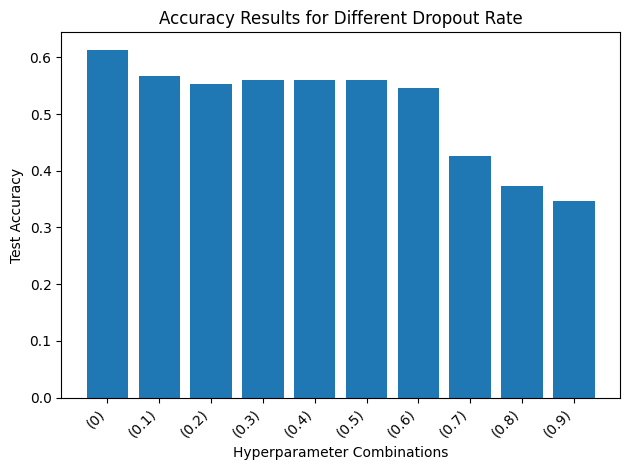

In [ ]:
import matplotlib.pyplot as plt

# Define hyperparameter values to experiment with
filter_sizes = [64]
kernel_sizes = [(5, 5)]
pooling_sizes = [(4, 4)]
dropout_rates = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Lists to store results
hyperparameter_combinations = []
accuracy_results = []

# Iterate over hyperparameter values
for filters in filter_sizes:
    for kernel_size in kernel_sizes:
        for pooling_size in pooling_sizes:
            for dropout_rate in dropout_rates:
                print(f"\nTraining model with filters={filters}, kernel_size={kernel_size}, pooling_size={pooling_size}, dropout_rate={dropout_rate}")

                # Build the CNN model
                model = models.Sequential()
                model.add(layers.Conv2D(filters, kernel_size, activation='relu', input_shape=(image_size, image_size, 3)))
                model.add(layers.MaxPooling2D(pooling_size))
                model.add(layers.Conv2D(filters, kernel_size, activation='relu'))
                model.add(layers.MaxPooling2D(pooling_size))
                model.add(layers.Flatten())
                model.add(layers.Dense(64, activation='relu'))
                model.add(layers.Dropout(dropout_rate))
                model.add(layers.Dense(len(categories), activation='softmax'))

                # Compile the model
                model.compile(optimizer='adam',
                              loss='sparse_categorical_crossentropy',
                              metrics=['accuracy'])

                # Train the model
                history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), verbose=0)

                # Evaluate the model on the test set
                test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
                print(f"Test accuracy: {test_acc}")

                # Store results
                hyperparameter_combinations.append(f"({dropout_rate})")
                accuracy_results.append(test_acc)

# Visualize the results
fig, ax = plt.subplots()
ax.bar(range(len(accuracy_results)), accuracy_results, tick_label=hyperparameter_combinations, align='center')
ax.set_ylabel('Test Accuracy')
ax.set_xlabel('Hyperparameter Combinations')
ax.set_title('Accuracy Results for Different Dropout Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Define hyperparameter values to experiment with
batch_sizes = [8, 16, 32]
epochs_list = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

# Lists to store results
hyperparameter_combinations = []
accuracy_results = []

# Iterate over hyperparameter values
for batch_size in batch_sizes:
    for epochs in epochs_list:
        print(f"\nTraining model with batch_size={batch_size}, epochs={epochs}")

        # Build the CNN model
        model = models.Sequential()
        model.add(layers.Conv2D(64, (5, 5), activation='relu', input_shape=(image_size, image_size, 3)))
        model.add(layers.MaxPooling2D((4, 4)))
        model.add(layers.Conv2D(64, (5, 5), activation='relu'))
        model.add(layers.MaxPooling2D((4, 4)))
        model.add(layers.Flatten())
        model.add(layers.Dense(64, activation='relu'))
        model.add(layers.Dense(len(categories), activation='softmax'))

        # Compile the model
        model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

        # Train the model
        history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=0)

        # Evaluate the model on the test set
        test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
        print(f"Test accuracy: {test_acc}")

        # Store results
        hyperparameter_combinations.append(f"(batch_size={batch_size}, epochs={epochs})")
        accuracy_results.append(test_acc)

# Visualize the results
fig, ax = plt.subplots()
ax.bar(range(len(accuracy_results)), accuracy_results, tick_label=hyperparameter_combinations, align='center')
ax.set_ylabel('Test Accuracy')
ax.set_xlabel('Hyperparameter Combinations')
ax.set_title('Accuracy Results for Different Hyperparameter Combinations')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Training model with batch_size=8, epochs=5
5/5 - 0s - loss: 2.9977 - accuracy: 0.5200 - 126ms/epoch - 25ms/step
Test accuracy: 0.5199999809265137

Training model with batch_size=8, epochs=10
5/5 - 0s - loss: 2.8146 - accuracy: 0.5800 - 157ms/epoch - 31ms/step
Test accuracy: 0.5799999833106995

Training model with batch_size=8, epochs=15
5/5 - 0s - loss: 2.9418 - accuracy: 0.6000 - 126ms/epoch - 25ms/step
Test accuracy: 0.6000000238418579

Training model with batch_size=8, epochs=20
5/5 - 0s - loss: 3.5476 - accuracy: 0.5533 - 129ms/epoch - 26ms/step
Test accuracy: 0.5533333420753479

Training model with batch_size=8, epochs=25
5/5 - 0s - loss: 3.4258 - accuracy: 0.5800 - 158ms/epoch - 32ms/step
Test accuracy: 0.5799999833106995

Training model with batch_size=8, epochs=30
5/5 - 0s - loss: 1.7988 - accuracy: 0.6400 - 123ms/epoch - 25ms/step
Test accuracy: 0.6399999856948853

Training model with batch_size=8, epochs=35
5/5 - 0s - loss: 2.4807 - accuracy: 0.6000 - 144ms/epoch - 29ms/step

In [ ]:
# Build the CNN model
model = models.Sequential()
model.add(layers.Conv2D(64, (5, 5), activation='relu', input_shape=(image_size, image_size, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((4, 4)))
model.add(layers.Conv2D(64, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((4, 4)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(len(categories), activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=16, validation_data=(X_test, y_test), verbose=0)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")

5/5 - 0s - loss: 1.8610 - accuracy: 0.5133 - 149ms/epoch - 30ms/step
Test accuracy: 0.5133333206176758


In [ ]:
# Build the CNN model
model = models.Sequential()
model.add(layers.Conv2D(64, (5, 5), activation='relu', input_shape=(image_size, image_size, 3)))
model.add(layers.LayerNormalization())
model.add(layers.MaxPooling2D((4, 4)))
model.add(layers.Conv2D(64, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((4, 4)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(len(categories), activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=16, validation_data=(X_test, y_test), verbose=0)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")

5/5 - 1s - loss: 6.4571 - accuracy: 0.4667 - 668ms/epoch - 134ms/step
Test accuracy: 0.46666666865348816


In [ ]:
# Build the CNN model
model = models.Sequential()
model.add(layers.Conv2D(64, (5, 5), activation='relu', input_shape=(image_size, image_size, 3)))
model.add(layers.GroupNormalization(groups=4))
model.add(layers.MaxPooling2D((4, 4)))
model.add(layers.Conv2D(64, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((4, 4)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(len(categories), activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=16, validation_data=(X_test, y_test), verbose=0)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")

5/5 - 1s - loss: 4.8695 - accuracy: 0.4933 - 532ms/epoch - 106ms/step
Test accuracy: 0.4933333396911621
